In [1]:
from trie import Trie, TrieVisualizer
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# 3.1

In [3]:
## 3.2

In [7]:
## 4.1

Creating trie with example words...

Adding words to trie:
Adding: apple


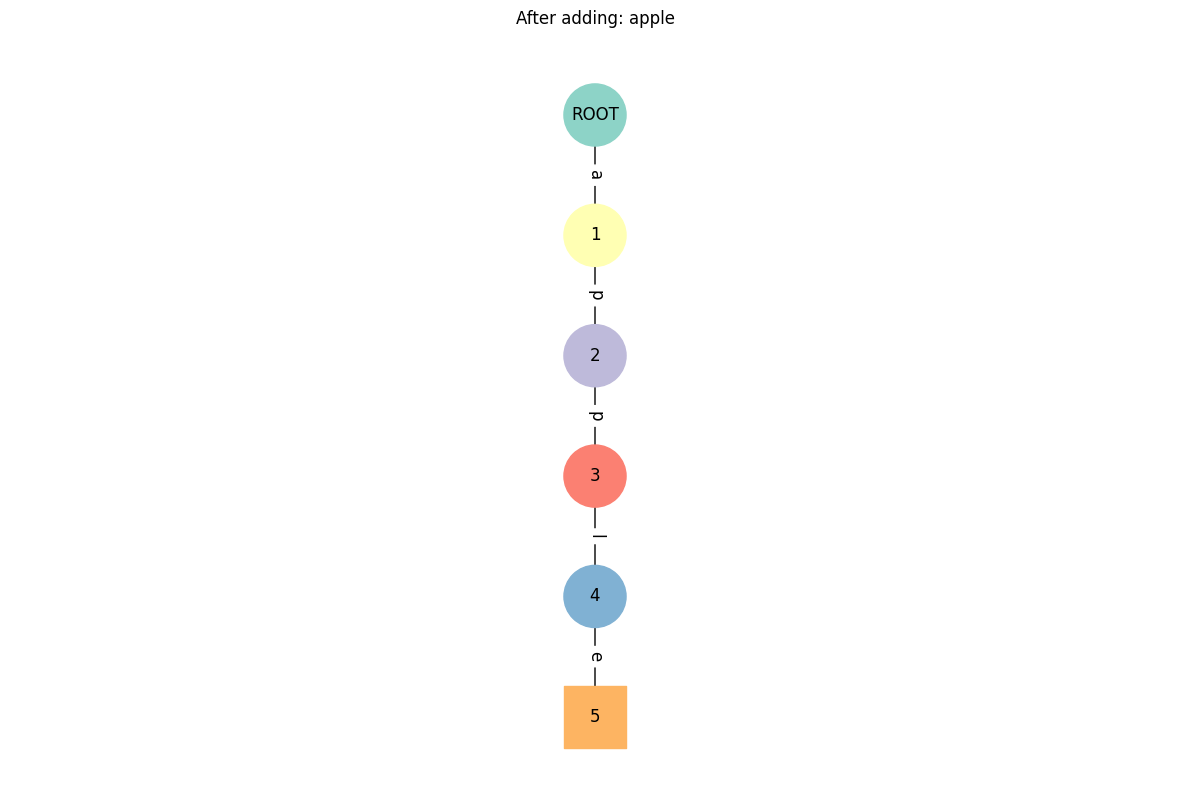

Adding: application


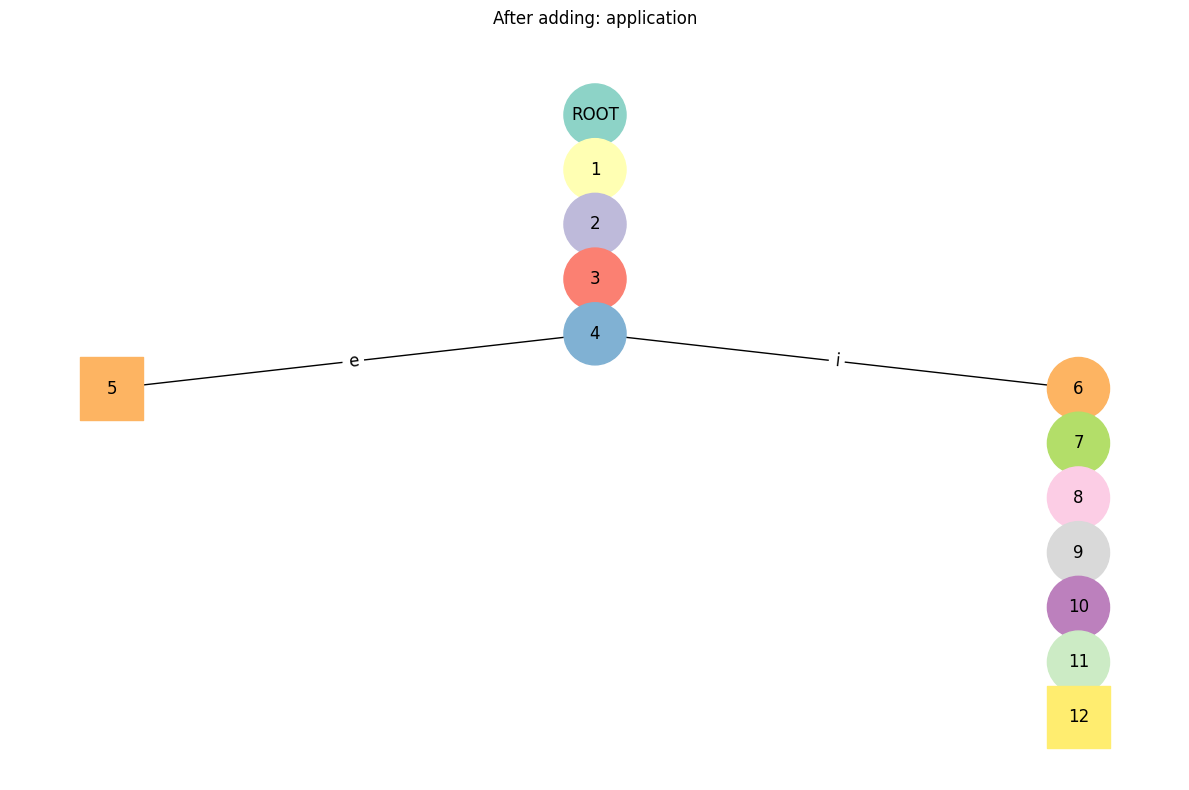

Adding: banana


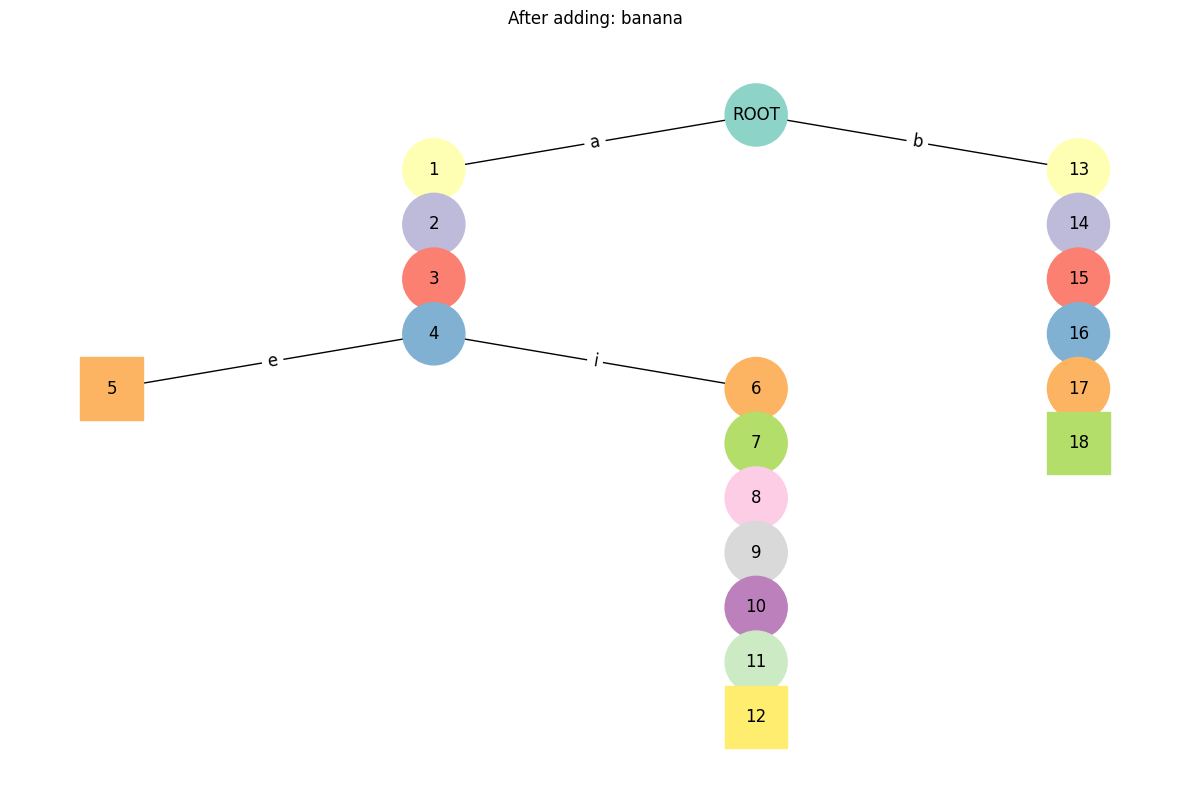

Adding: cat


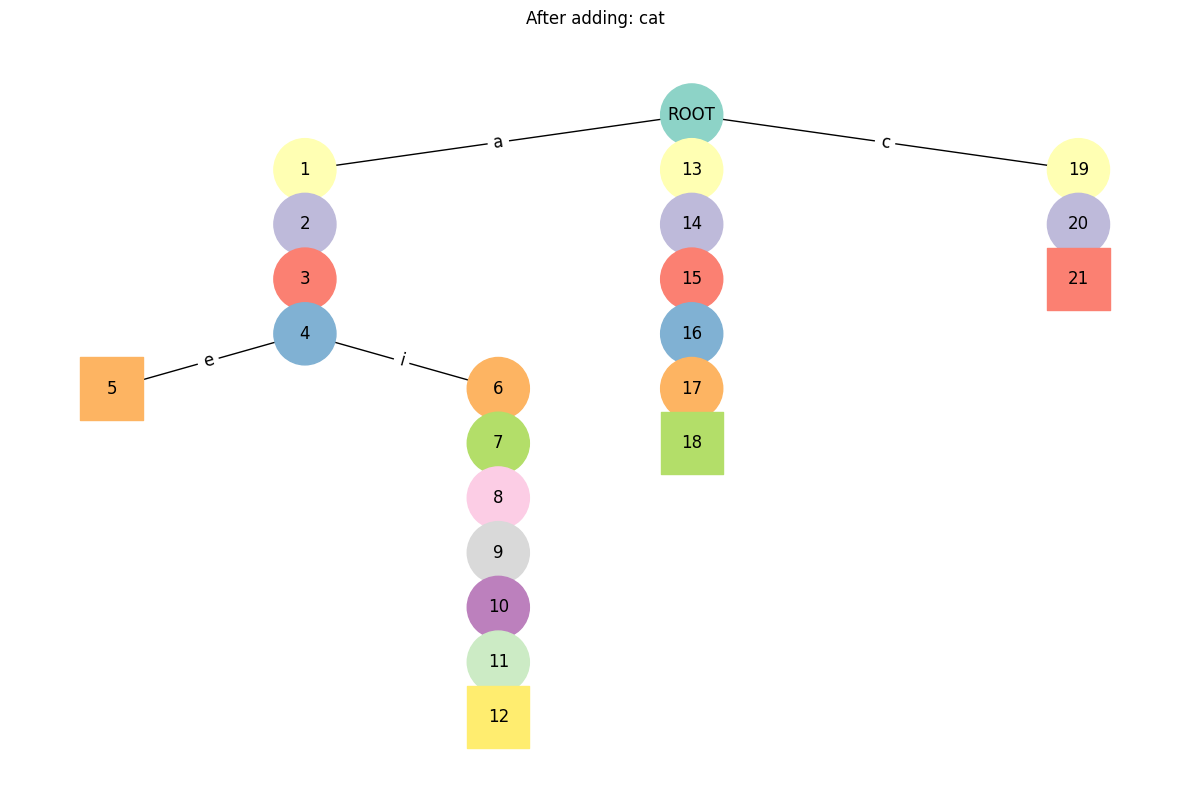

Adding: appropriate


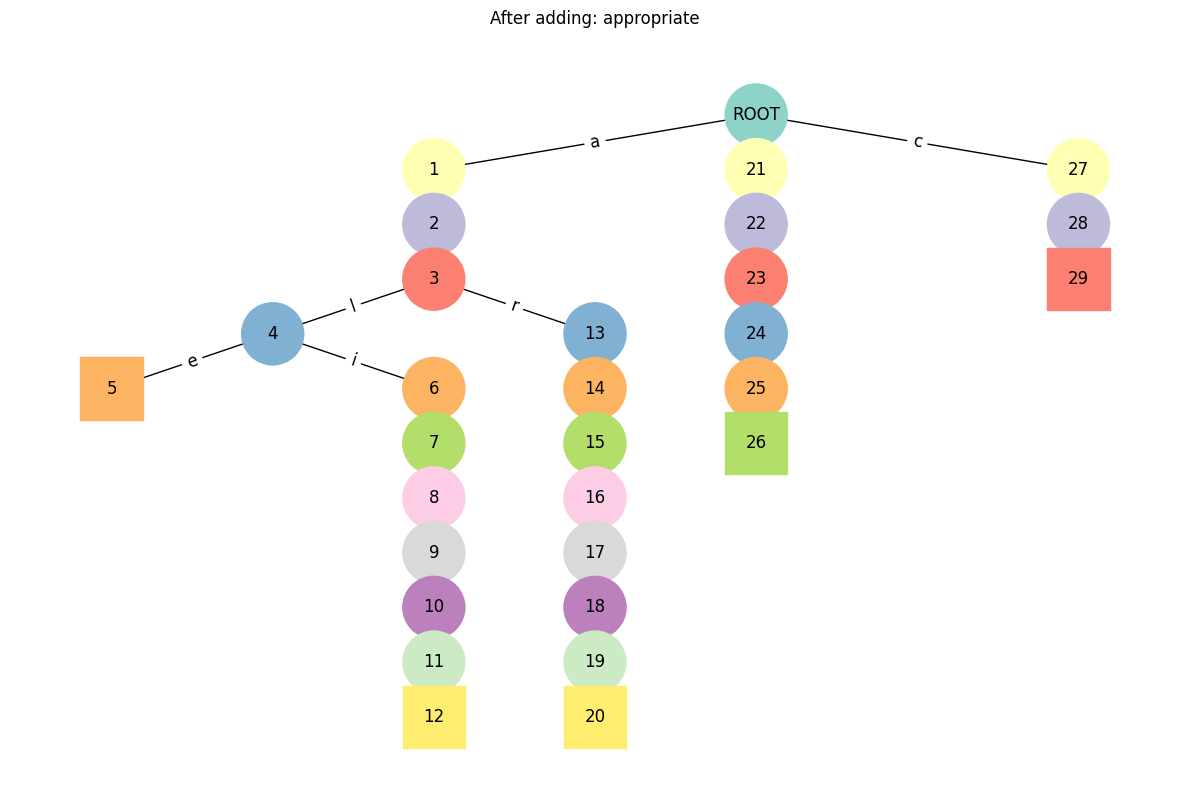

Adding: app


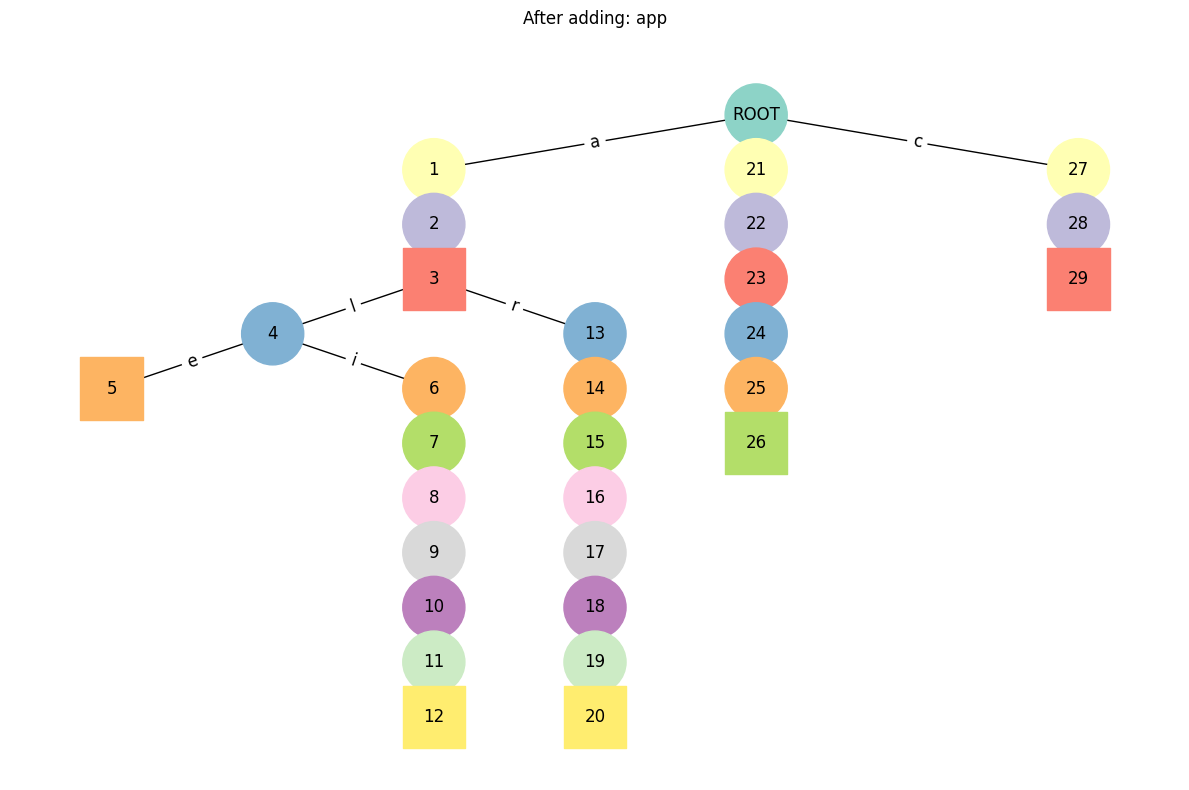


--- Demonstrating suffix counting with visualization ---

Looking for words ending with 'e':
Found word ending with 'e': apple


TypeError: TrieVisualizer.visualize_trie() got an unexpected keyword argument 'highlight_path'

In [4]:

class Homework(Trie):
    def __init__(self):
        super().__init__()
        self.visualizer = TrieVisualizer()

    def count_words_with_suffix(self, pattern) -> int:
        """Counts words ending with the given pattern (case-sensitive)"""
        if not isinstance(pattern, str):
            raise TypeError("Pattern must be a string")
        if not pattern:
            raise ValueError("Pattern cannot be empty")
            
        def _traverse_and_count(node, current_word, path=None):
            if path is None:
                path = ["root"]
                
            count = 0
            current_path = path.copy()
            
            if node.is_end():
                if current_word.endswith(pattern):
                    print(f"Found word ending with '{pattern}': {current_word}")
                    # Visualize with path highlighting
                    self.visualizer.visualize_trie(
                        self,
                        f"Found word: {current_word}",
                        highlight_path=current_path,
                        highlight_nodes=[current_path[-1]]
                    )
                    count += 1
                
            for char, child_node in node.get_children().items():
                self.node_count += 1
                child_path = current_path + [f"node_{self.node_count}"]
                count += _traverse_and_count(child_node, current_word + char, child_path)
                
            return count
            
        self.node_count = 0
        return _traverse_and_count(self.get_root(), "")

    def has_prefix(self, prefix) -> bool:
        """Checks if any word in the trie starts with the given prefix"""
        if not isinstance(prefix, str):
            raise TypeError("Prefix must be a string")
        if not prefix:
            raise ValueError("Prefix cannot be empty")
            
        current = self.get_root()
        path = ["root"]
        prefix_chars = []
        
        for char in prefix:
            if char not in current.get_children():
                print(f"Prefix '{prefix}' not found: stopped at '{''.join(prefix_chars)}', '{char}' not found")
                # Visualize the failed path
                self.visualizer.visualize_trie(
                    self,
                    f"Prefix search failed at: {''.join(prefix_chars)}",
                    highlight_path=path
                )
                return False
                
            self.node_count += 1
            current = current.get_children()[char]
            prefix_chars.append(char)
            path.append(f"node_{self.node_count}")
        
        print(f"Found prefix '{prefix}' in trie")
        # Visualize the successful path
        self.visualizer.visualize_trie(
            self,
            f"Found prefix: {prefix}",
            highlight_path=path,
            highlight_nodes=[path[-1]]
        )
        return True

if __name__ == "__main__":
    # Create and populate trie
    print("Creating trie with example words...")
    trie = Homework()
    words = ["apple", "application", "banana", "cat", "appropriate", "app"]
    
    print("\nAdding words to trie:")
    for i, word in enumerate(words):
        print(f"Adding: {word}")
        trie.put(word, i)
        trie.visualizer.visualize_trie(trie, f"After adding: {word}")
    
    # Demonstrate suffix counting with visualization
    print("\n--- Demonstrating suffix counting with visualization ---")
    patterns = ["e", "ion", "p"]
    for pattern in patterns:
        print(f"\nLooking for words ending with '{pattern}':")
        count = trie.count_words_with_suffix(pattern)
        print(f"Total words ending with '{pattern}': {count}")
    
    # Demonstrate prefix checking with visualization
    print("\n--- Demonstrating prefix checking with visualization ---")
    prefixes = ["app", "xyz", "ban", "App"]
    for prefix in prefixes:
        print(f"\nChecking for prefix '{prefix}':")
        exists = trie.has_prefix(prefix)
        print(f"Words with prefix '{prefix}' exist: {exists}")

## 4.2


==================== Basic Example ====================
Input strings: ['flower', 'flow', 'flight']

Processing input strings: ['flower', 'flow', 'flight']

Adding word to trie: flower


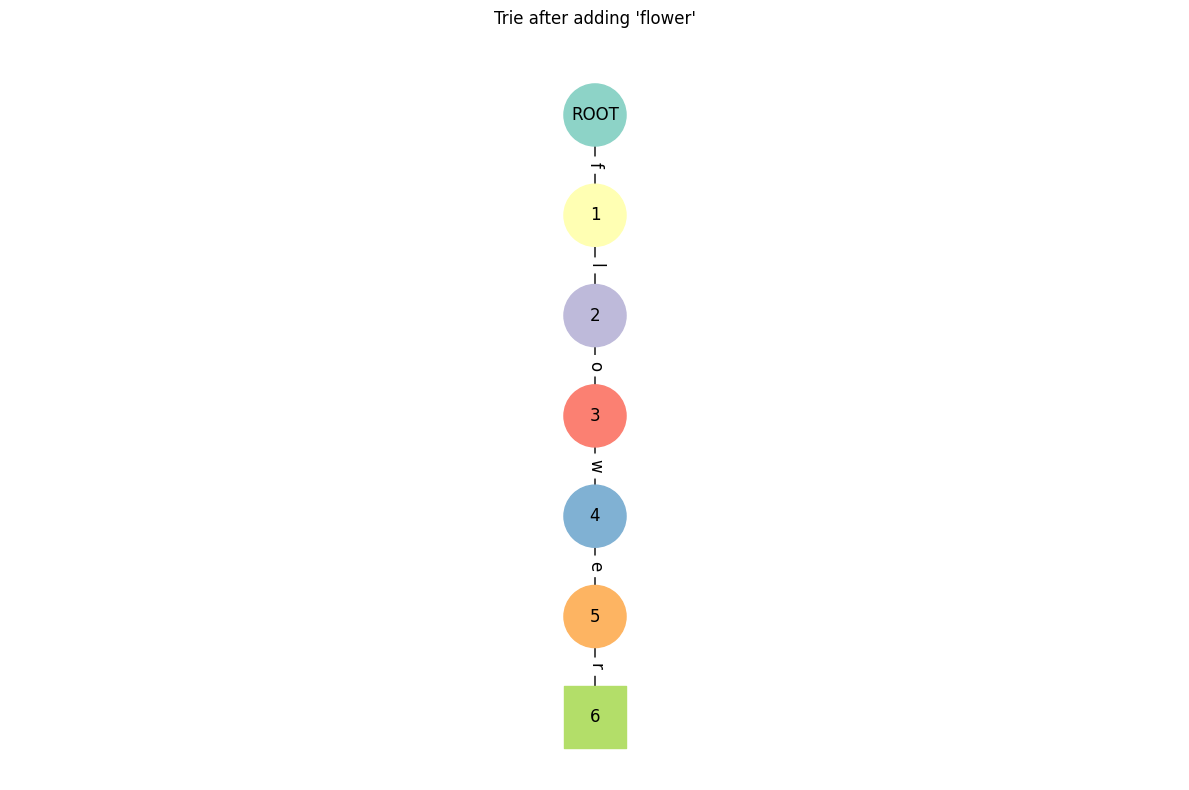


Adding word to trie: flow


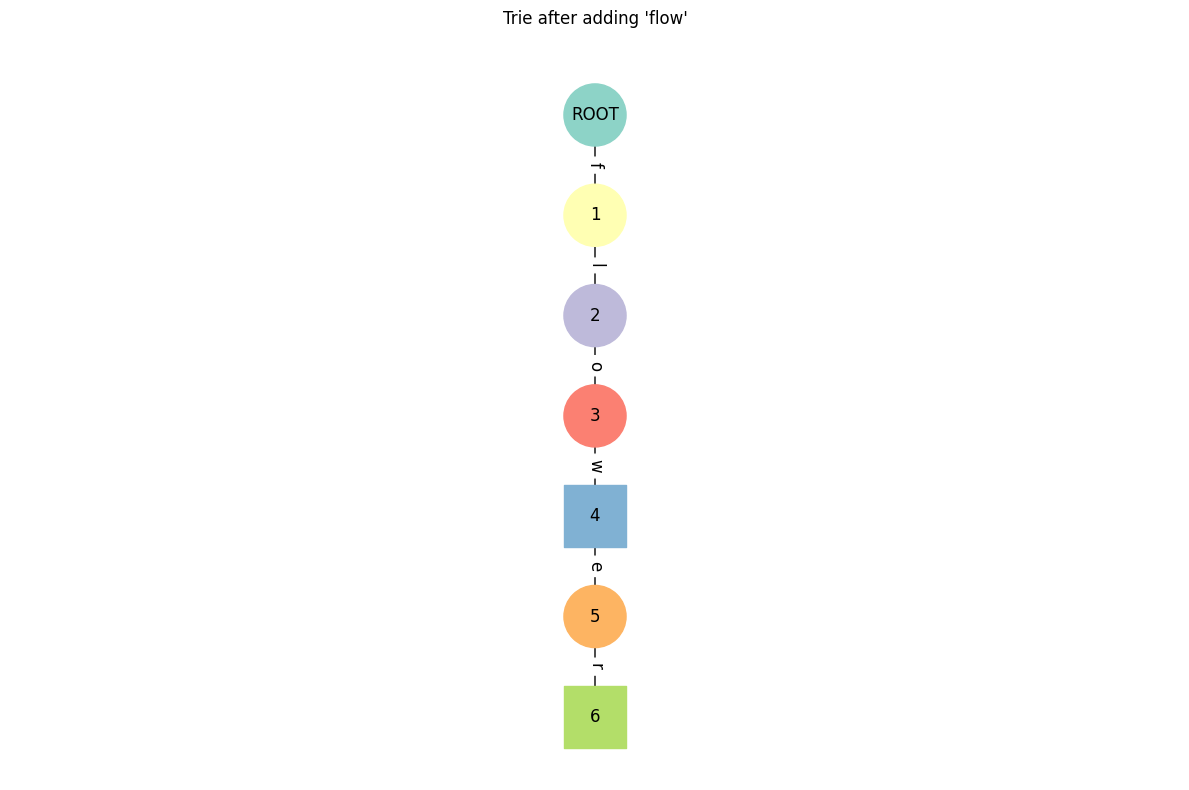


Adding word to trie: flight


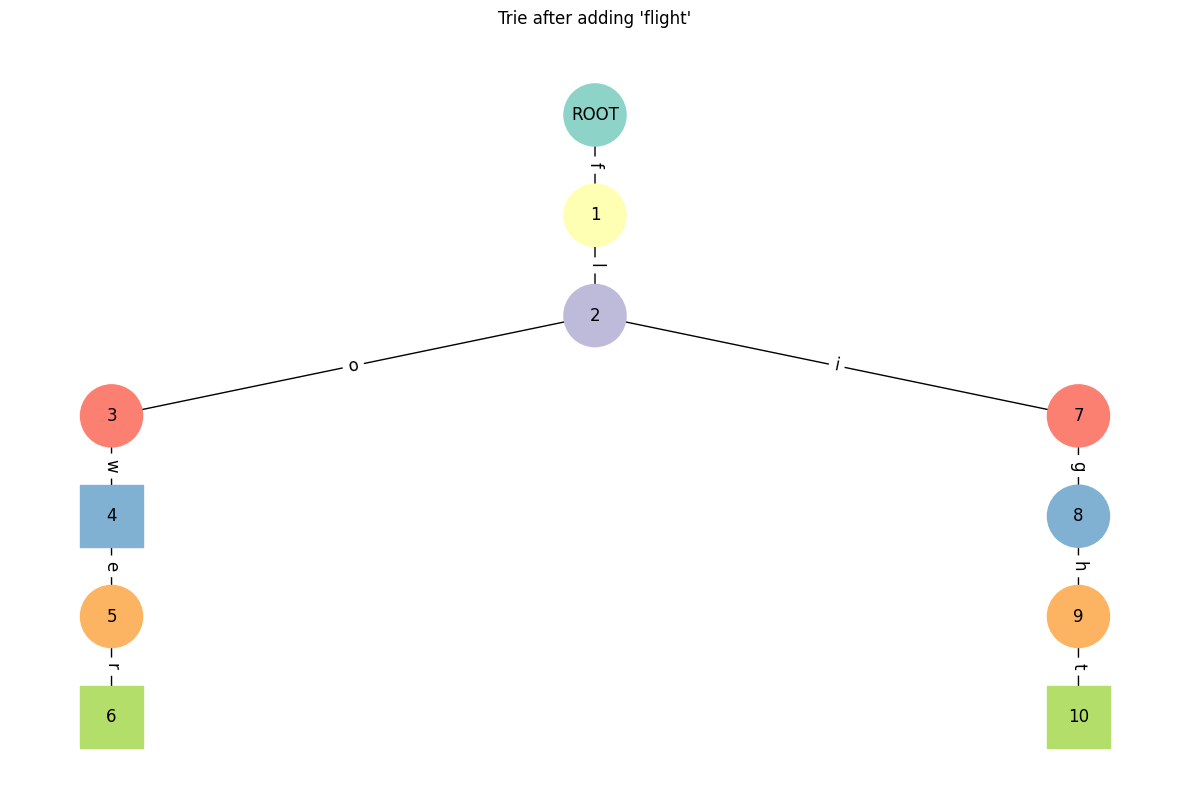


Searching for longest common prefix...
Following single path: 'f'
  Following single path: 'l'
    Found branching point at 'fl' with 2 children:
    - Branch: 'o'
    - Branch: 'i'

Final Trie structure:


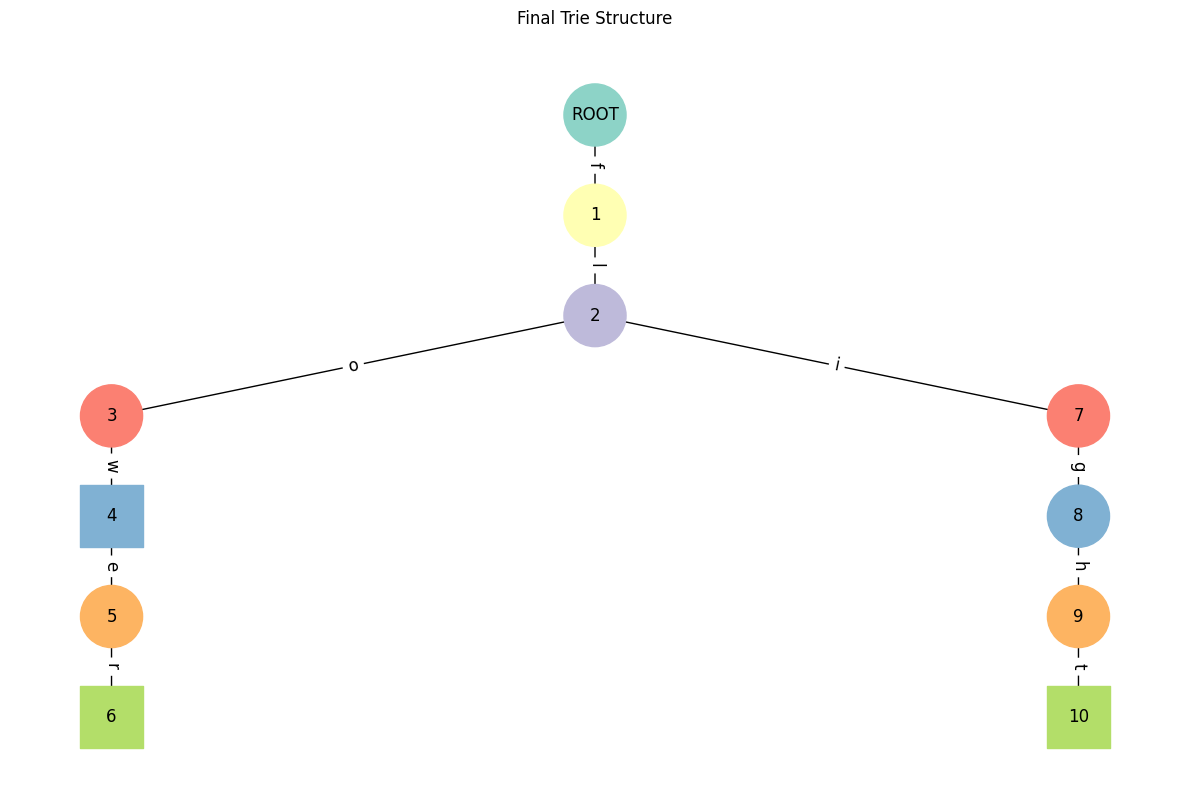


Found longest common prefix: 'fl'


Final result: 'fl'

==================== Longer Common Prefix ====================
Input strings: ['interspecies', 'interstellar', 'interstate']

Processing input strings: ['interspecies', 'interstellar', 'interstate']

Adding word to trie: interspecies


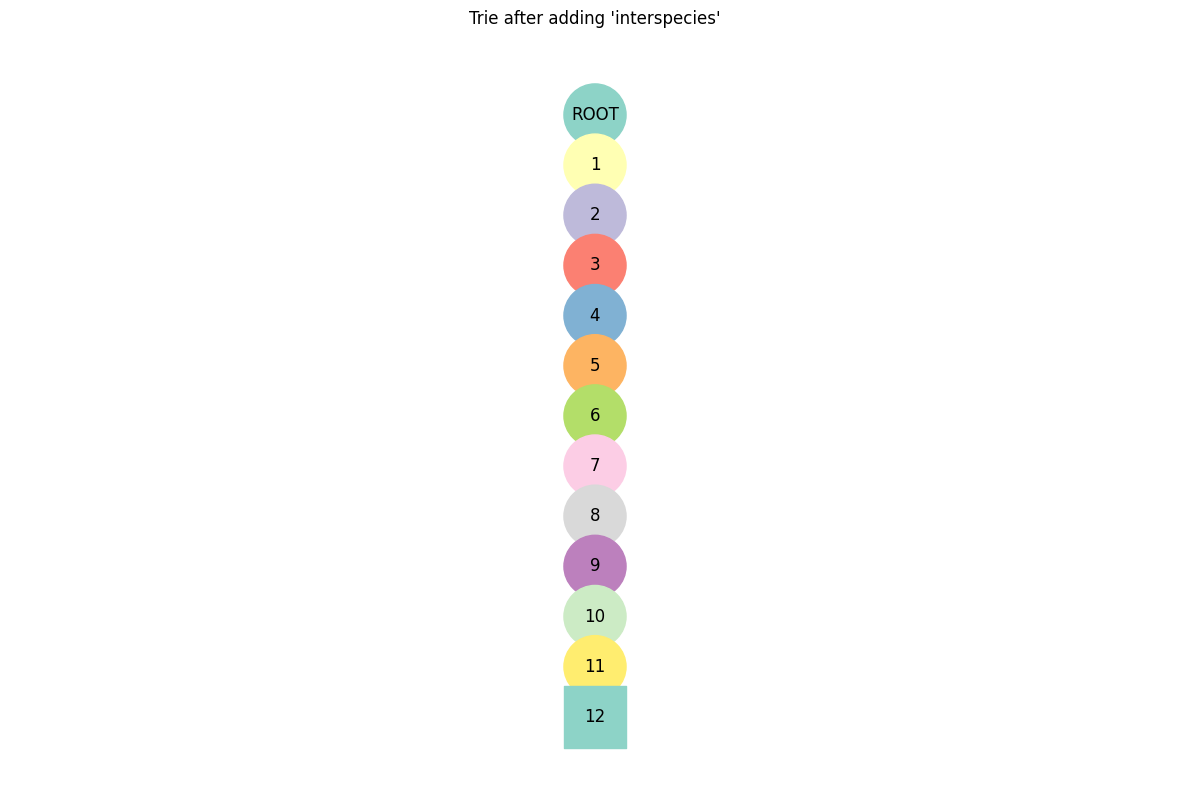


Adding word to trie: interstellar


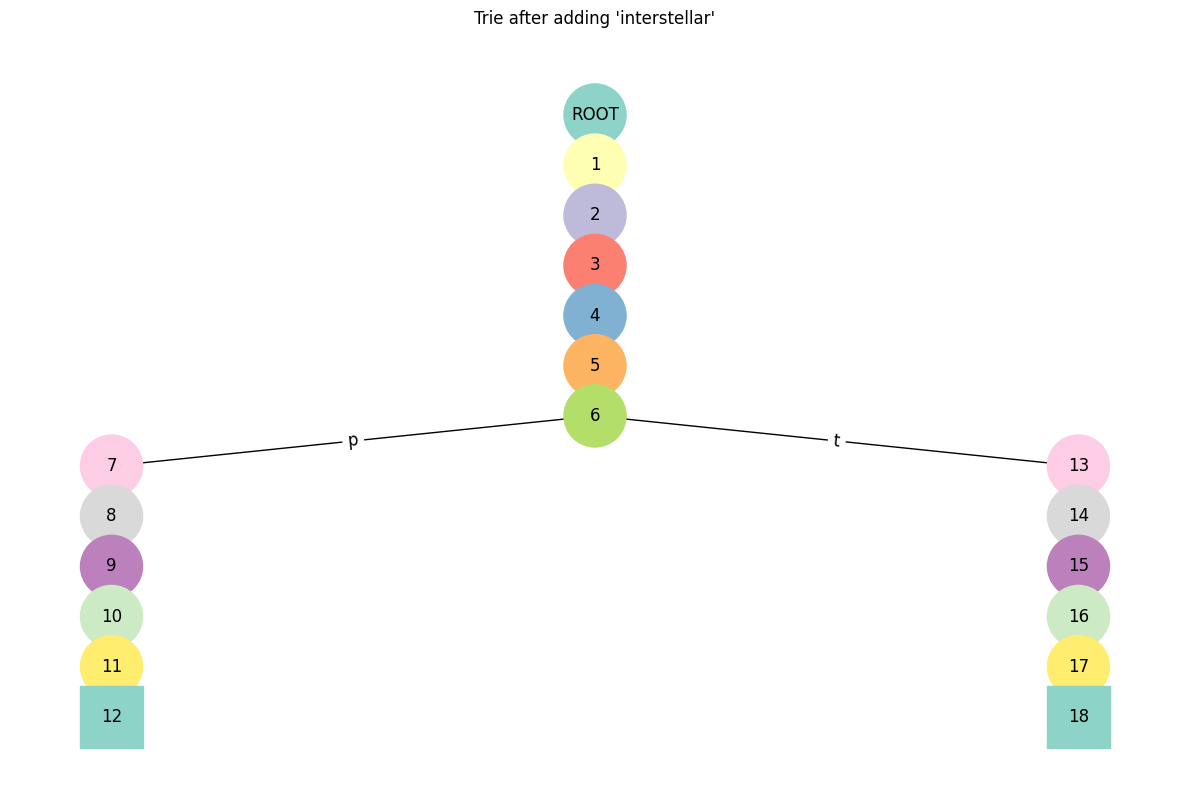


Adding word to trie: interstate


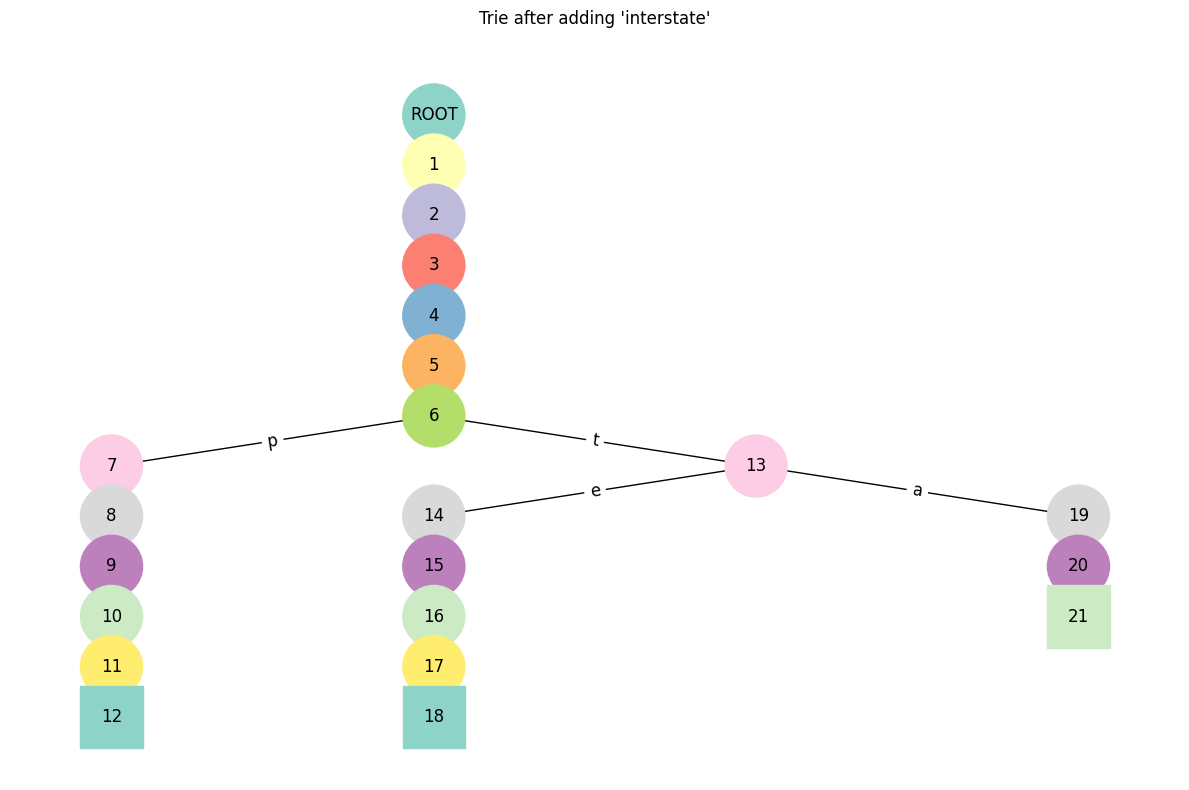


Searching for longest common prefix...
Following single path: 'i'
  Following single path: 'n'
    Following single path: 't'
      Following single path: 'e'
        Following single path: 'r'
          Following single path: 's'
            Found branching point at 'inters' with 2 children:
            - Branch: 'p'
            - Branch: 't'

Final Trie structure:


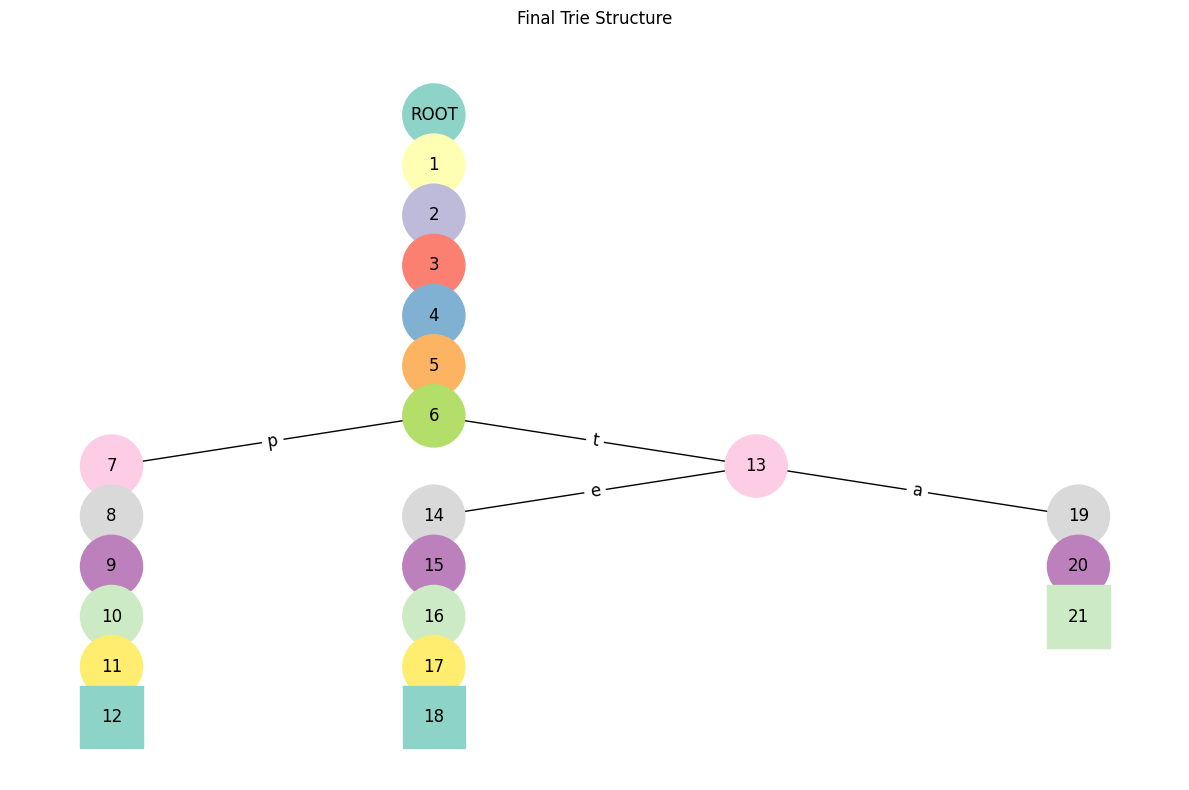


Found longest common prefix: 'inters'


Final result: 'inters'

==================== Complete Word as Prefix ====================
Input strings: ['cat', 'catalog', 'category']

Processing input strings: ['cat', 'catalog', 'category']

Adding word to trie: cat


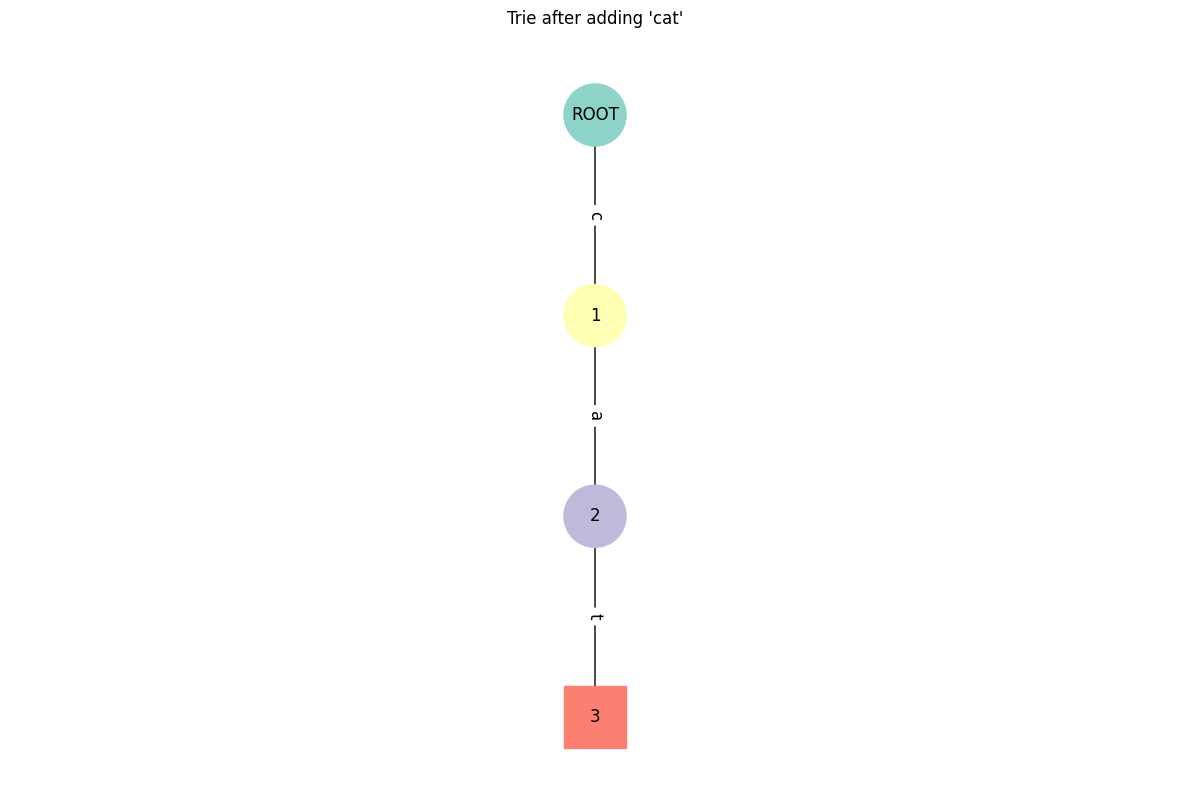


Adding word to trie: catalog


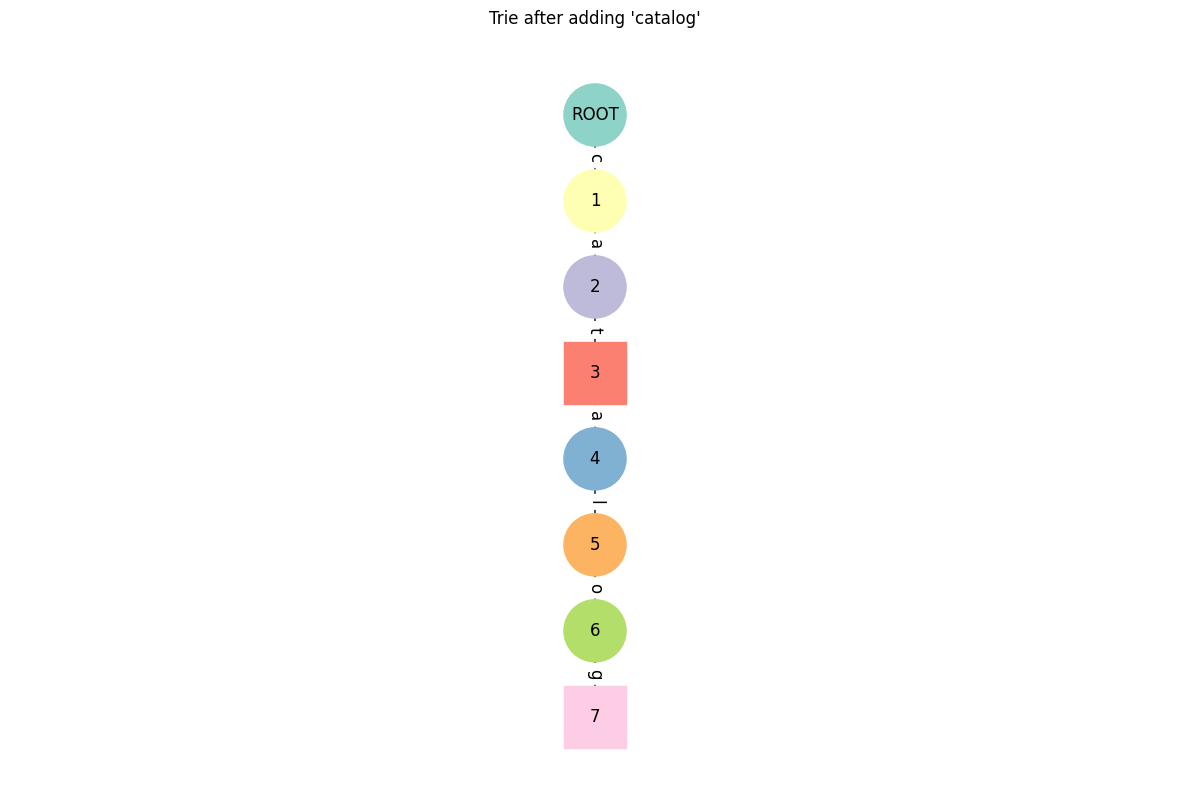


Adding word to trie: category


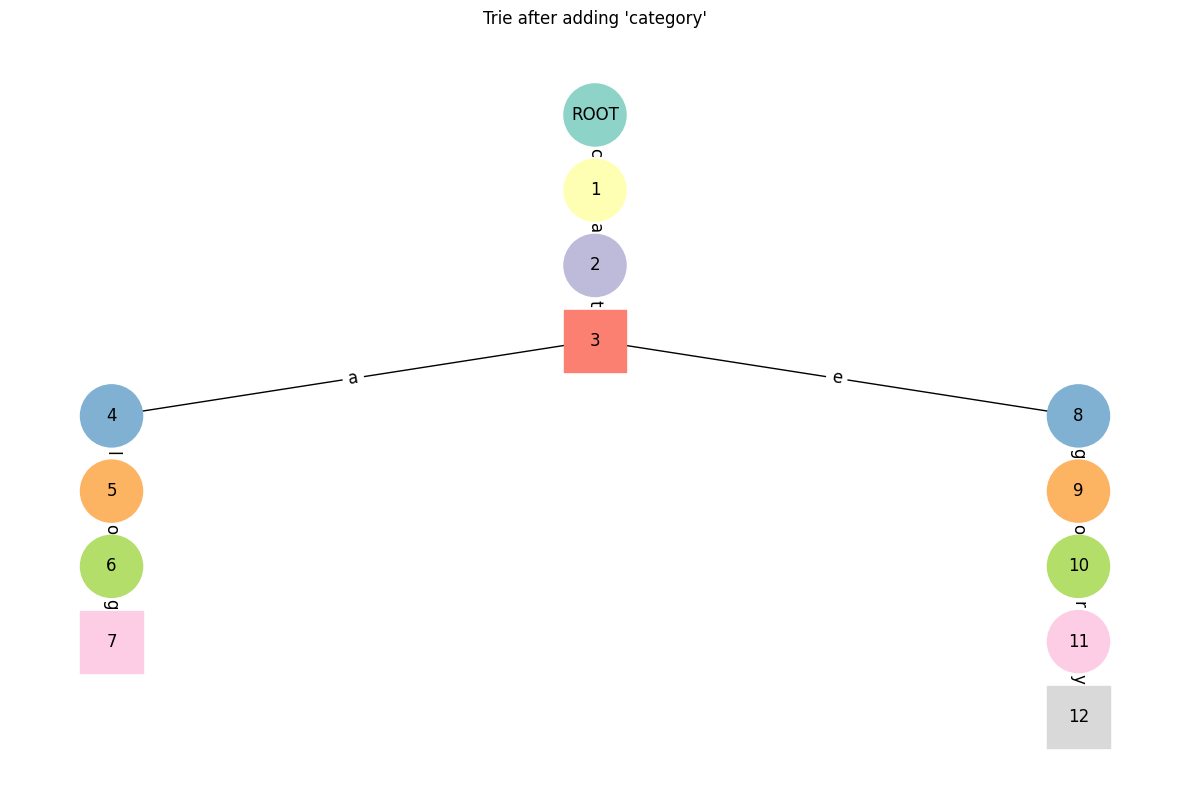


Searching for longest common prefix...
Following single path: 'c'
  Following single path: 'a'
    Following single path: 't'
      Found word end at: 'cat'

Final Trie structure:


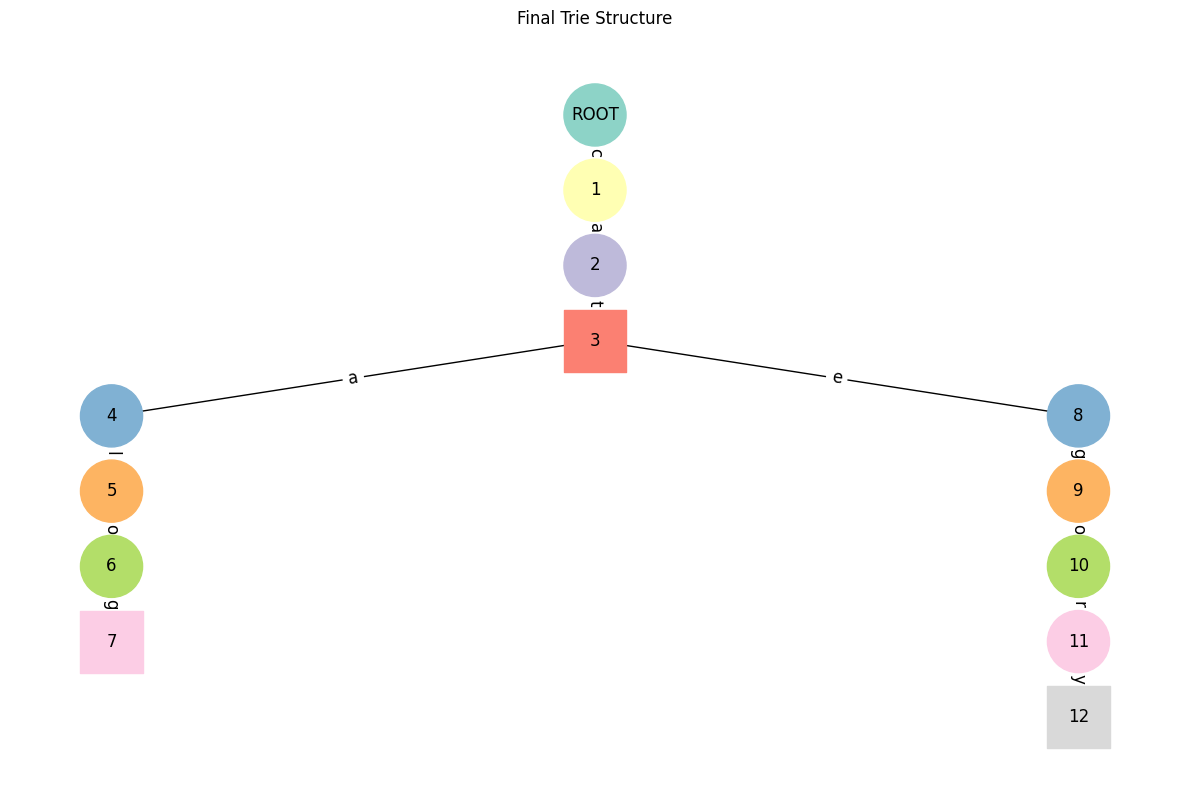


Found longest common prefix: 'cat'


Final result: 'cat'


In [5]:


class LongestCommonWord(Trie):
    def __init__(self):
        super().__init__()
        self.visualizer = TrieVisualizer()
    
    def find_longest_common_word(self, strings) -> str:
        """
        Finds the longest common prefix among all strings in the input array.
        Includes visualization of the process.
        """
        if not isinstance(strings, list):
            print(f"Error: Expected list input, got {type(strings)}")
            raise TypeError("Input must be a list of strings")
            
        if not strings:
            print("Input list is empty, returning empty string")
            return ""
            
        non_strings = [str(x) for x in strings if not isinstance(x, str)]
        if non_strings:
            print(f"Error: Found non-string elements: {non_strings}")
            raise TypeError("All elements must be strings")
            
        print(f"\nProcessing input strings: {strings}")
        
        # Build trie and visualize progress
        for i, word in enumerate(strings):
            print(f"\nAdding word to trie: {word}")
            self.put(word, i)
            # Visualize after each word
            self.visualizer.visualize_trie(
                self, 
                f"Trie after adding '{word}'"
            )
            
        def _find_common_prefix(node, prefix, depth=0):
            indent = "  " * depth
            
            if node.is_end():
                print(f"{indent}Found word end at: '{prefix}'")
                return prefix
                
            child_count = len(node.get_children())
            if child_count > 1:
                print(f"{indent}Found branching point at '{prefix}' with {child_count} children:")
                for char in node.get_children().keys():
                    print(f"{indent}- Branch: '{char}'")
                return prefix
                
            if child_count == 1:
                char, child = next(iter(node.get_children().items()))
                print(f"{indent}Following single path: '{char}'")
                return _find_common_prefix(child, prefix + char, depth + 1)
                
            print(f"{indent}No children found at '{prefix}'")
            return prefix
            
        print("\nSearching for longest common prefix...")
        result = _find_common_prefix(self.get_root(), "")
        
        # Final visualization
        print("\nFinal Trie structure:")
        self.visualizer.visualize_trie(self, "Final Trie Structure")
        
        print(f"\nFound longest common prefix: '{result}'\n")
        return result

if __name__ == "__main__":
    # Example usage
    examples = [
        ("Basic Example", ["flower", "flow", "flight"]),
        ("Longer Common Prefix", ["interspecies", "interstellar", "interstate"]),
        ("Complete Word as Prefix", ["cat", "catalog", "category"])
    ]
    
    for name, strings in examples:
        print(f"\n{'='*20} {name} {'='*20}")
        print(f"Input strings: {strings}")
        
        trie = LongestCommonWord()
        result = trie.find_longest_common_word(strings)
        
        print(f"\nFinal result: '{result}'")
        print("="*60)